Keval Shah   


60009220061



  TSA Lab5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_excel('/content/whole_merged_properly.xlsx')

In [5]:
df.head()

,DateTime,Air temperature | (°C),Pressure | (atm),Wind speed | (m/s),Power generated by system | (MW)
0,2019-01-01 01:00:00.000,10.926,0.979103,9.014,33.6881
1,2019-01-01 02:00:00.000,9.919,0.979566,9.428,37.2619
2,2019-01-01 03:00:00.005,8.567,0.979937,8.700,30.5029
3,2019-01-01 04:00:00.010,7.877,0.980053,8.481,28.4192
4,2019-01-01 05:00:00.015,7.259,0.979867,8.383,27.3703


In [6]:
df.columns

Index(['DateTime', 'Air temperature | (°C)', 'Pressure | (atm)',
       'Wind speed | (m/s)', 'Power generated by system | (MW)'],
      dtype='object')

In [7]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

In [8]:
def handle_missing_values(df):
    df.fillna(method='ffill', inplace=True)
    return df

In [9]:
df = handle_missing_values(df)

In [10]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    if result[1] < 0.05:
        print("The time series is stationary")
    else:
        print("The time series is not stationary")

In [11]:
print("ADF Test before transformation:")
adf_test(df['Power generated by system | (MW)'])

ADF Test before transformation:
ADF Statistic: -21.21153899144535
p-value: 0.0
Critical Value 1%: -3.430499403352111
Critical Value 5%: -2.8616060330062463
Critical Value 10%: -2.5668051472213618
The time series is stationary


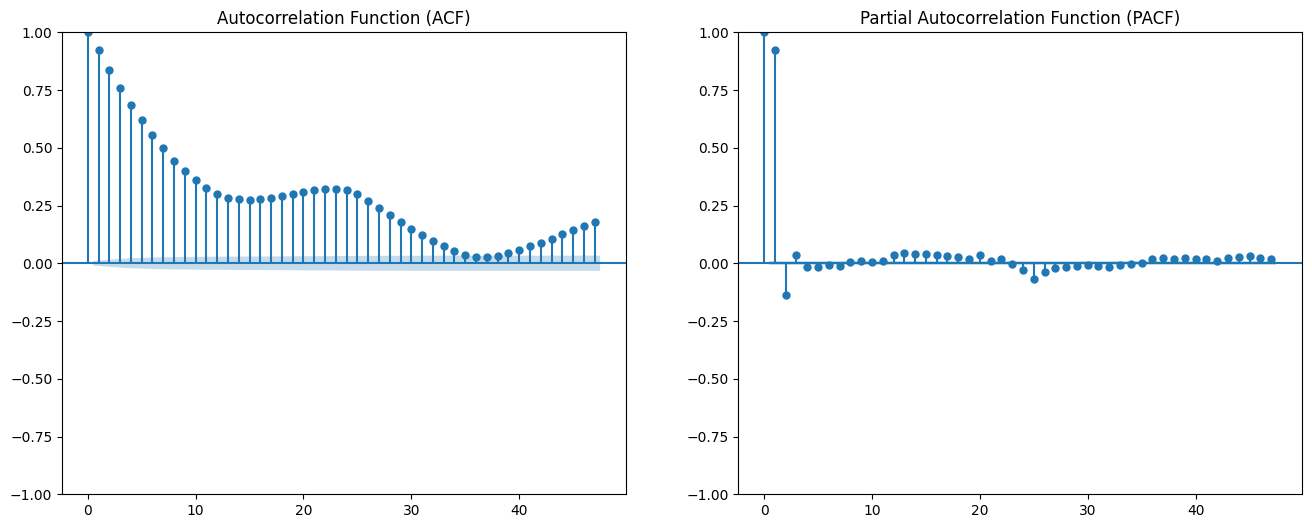

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

series = df['Power generated by system | (MW)']

fig, axes = plt.subplots(1, 2, figsize=(16,6))

plot_acf(series, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(series, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()

In [13]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Power generated by system | (MW)'], order=(1, 0, 2))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:     Power generated by system | (MW)   No. Observations:                43823
Model:                               ARIMA(1, 0, 2)   Log Likelihood             -144010.438
Date:                              Wed, 23 Oct 2024   AIC                         288030.875
Time:                                      15:45:26   BIC                         288074.315
Sample:                                           0   HQIC                        288044.567
                                            - 43823                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8340      0.512     28.995      0.000      13.831      15.837
ar.L1          0.90

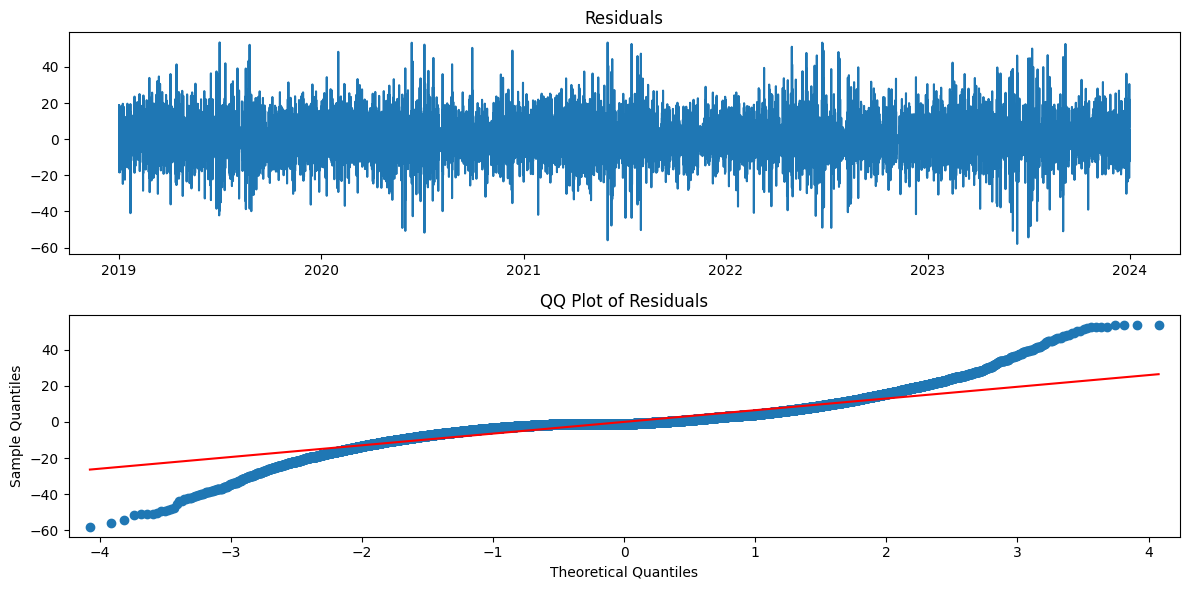

      lb_stat  lb_pvalue
10  33.621765   0.000214


In [25]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Get residuals
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(212)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('QQ Plot of Residuals')
plt.tight_layout()
plt.show()

# Perform Ljung-Box test
lb_test = sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions = model_fit.predict(start=0, end=len(df) - 1)

actual = df['Power generated by system | (MW)']

RMSE: 6.470841367712301
MAE: 4.005367911985668
R²: 0.8590357645138663


In [28]:
rmse = np.sqrt(mean_squared_error(actual, predictions))
print(f'RMSE: {rmse}')

RMSE: 6.470841367712301


In [29]:
mae = mean_absolute_error(actual, predictions)
print(f'MAE: {mae}')

MAE: 4.005367911985668


In [30]:
r2 = r2_score(actual, predictions)
print(f'R²: {r2}')

R²: 0.8590357645138663


# Conclusion

The ARMA(1, 0, 2) model for forecasting power generation has shown promising results. Here are the key takeaways:

1. **Model Fit**: The model explains about **86%** of the variation in power generation, indicating a strong correlation between predicted and actual values.

2. **Accuracy**: With an RMSE of **6.47 MW** and MAE of **4.01 MW**, the model's predictions are quite reliable, which can help in making informed operational decisions.

3. **Visual Assessment**: Overall, the model tracks the actual data well, although some deviations occur at times.

## Applications

This forecasting model has practical uses, such as:

- **Energy Management**: Helps utilities optimize production and distribution.
- **Renewable Integration**: Aids in planning for renewable energy sources.
- **Market Trading**: Supports traders in making strategic decisions based on forecasts.

